In [2]:
!pip install pydicom pillow


  Using cached pydicom-2.4.2-py3-none-any.whl (1.8 MB)


In [ ]:
#Hyperparameter tuning
# ImageDataCollector

In [3]:
import pydicom
from PIL import Image
import numpy as np
import os


def dicom_to_rgb_png_fixed(dicom_file, output_prefix=""):
    # Load the DICOM file
    ds = pydicom.dcmread(dicom_file)
    
    # Extract slices 40, 41, and 42
    slice_40 = ds.pixel_array[40]
    slice_41 = ds.pixel_array[41]
    slice_42 = ds.pixel_array[42]
    
    # Normalize the slices to the range 0-255
    slice_40 = ((slice_40 - slice_40.min()) / (slice_40.max() - slice_40.min()) * 255).astype(np.uint8)
    slice_41 = ((slice_41 - slice_41.min()) / (slice_41.max() - slice_41.min()) * 255).astype(np.uint8)
    slice_42 = ((slice_42 - slice_42.min()) / (slice_42.max() - slice_42.min()) * 255).astype(np.uint8)
    
    # Create an RGB image from the slices
    rgb_image = np.stack((slice_40, slice_41, slice_42), axis=-1)
    
    # Convert the RGB numpy array to a PIL Image
    img = Image.fromarray(rgb_image)
    
    # Save the image in PNG format with the specified prefix
    img_path = os.path.join(os.path.dirname(dicom_file), output_prefix + os.path.basename(dicom_file).replace('.dcm', '.png'))
    img.save(img_path)

    return img_path

# Testing the function isn't feasible here since we don't have access to the DICOM files, but this modification should resolve the error you encountered.

# Test the function
dicom_to_rgb_png_fixed('scans/scan_1.dcm')


'scans\\scan_1.png'

In [5]:
import os

def process_all_dicoms(root_directory, output_directory, prefix = "control"):
    # Ensure the output directory exists
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Counter for naming the output images
    counter = 1

    # Walk through all directories and files in the root directory
    for dirpath, dirnames, filenames in os.walk(root_directory):
        for file in filenames:
            # Check if the file has a .dcm extension (indicating it's a DICOM file)
            if file.endswith('.dcm'):
                # Construct the full path to the DICOM file
                full_path = os.path.join(dirpath, file)
                
                # Convert the DICOM to a 3-channel PNG image
                png_path = dicom_to_rgb_png_fixed(full_path)
                
                # Generate the new filename using the counter
                new_filename = f"{prefix}_{counter}.png"
                new_png_path = os.path.join(output_directory, new_filename)
                
                # Move the PNG to the output directory with the new filename
                os.rename(png_path, new_png_path)
                
                # Increment the counter
                counter += 1

    print(f"All DICOM files in '{root_directory}' have been processed and saved to '{output_directory}'.")

# Use the function
#process_all_dicoms('control', 'control_images')
#process_all_dicoms('positive', 'control_images', 'pd')

All DICOM files in 'positive' have been processed and saved to 'control_images'.


C:\Users\gupta\AppData\Local\Temp\ipykernel_25744\1058033070.py:17: RuntimeWarning: invalid value encountered in true_divide
  slice_40 = ((slice_40 - slice_40.min()) / (slice_40.max() - slice_40.min()) * 255).astype(np.uint8)
C:\Users\gupta\AppData\Local\Temp\ipykernel_25744\1058033070.py:18: RuntimeWarning: invalid value encountered in true_divide
  slice_41 = ((slice_41 - slice_41.min()) / (slice_41.max() - slice_41.min()) * 255).astype(np.uint8)
C:\Users\gupta\AppData\Local\Temp\ipykernel_25744\1058033070.py:19: RuntimeWarning: invalid value encountered in true_divide
  slice_42 = ((slice_42 - slice_42.min()) / (slice_42.max() - slice_42.min()) * 255).astype(np.uint8)


In [10]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

# Directory containing the images
data_directory = "data"

# Load images and labels
images = []
labels = []

for filename in os.listdir(data_directory):
    if filename.startswith("control"):
        labels.append(0)
    elif filename.startswith("pd"):
        labels.append(1)
    else:
        # Skip files that don't match the expected naming convention
        continue
    
    img_path = os.path.join(data_directory, filename)
    img = Image.open(img_path)
    images.append(img)

# Convert the list of images to numpy arrays
images = [np.array(img) for img in images]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

len(X_train), len(X_val)  # Display the number of images in training and validation sets


(566, 142)

In [11]:
X_train = np.array(X_train) / 255.0
X_val = np.array(X_val) / 255.0
y_train = np.array(y_train)
y_val = np.array(y_val)


Epoch 1/20
18/18 [==============================] - 52s 2s/step - loss: 0.6336 - accuracy: 0.6431 - val_loss: 0.5805 - val_accuracy: 0.6831
Epoch 2/20
18/18 [==============================] - 30s 2s/step - loss: 0.4876 - accuracy: 0.7544 - val_loss: 0.5543 - val_accuracy: 0.7254
Epoch 3/20
18/18 [==============================] - 26s 1s/step - loss: 0.4152 - accuracy: 0.8286 - val_loss: 0.5652 - val_accuracy: 0.7113
Epoch 4/20
18/18 [==============================] - 27s 2s/step - loss: 0.3659 - accuracy: 0.8551 - val_loss: 0.5579 - val_accuracy: 0.7113
Epoch 5/20
18/18 [==============================] - 26s 1s/step - loss: 0.3304 - accuracy: 0.8905 - val_loss: 0.5537 - val_accuracy: 0.7394
Epoch 6/20
18/18 [==============================] - 29s 2s/step - loss: 0.3017 - accuracy: 0.9046 - val_loss: 0.5565 - val_accuracy: 0.7465
Epoch 7/20
18/18 [==============================] - 27s 2s/step - loss: 0.2754 - accuracy: 0.9099 - val_loss: 0.5602 - val_accuracy: 0.7394
Epoch 8/20
18/18 [==

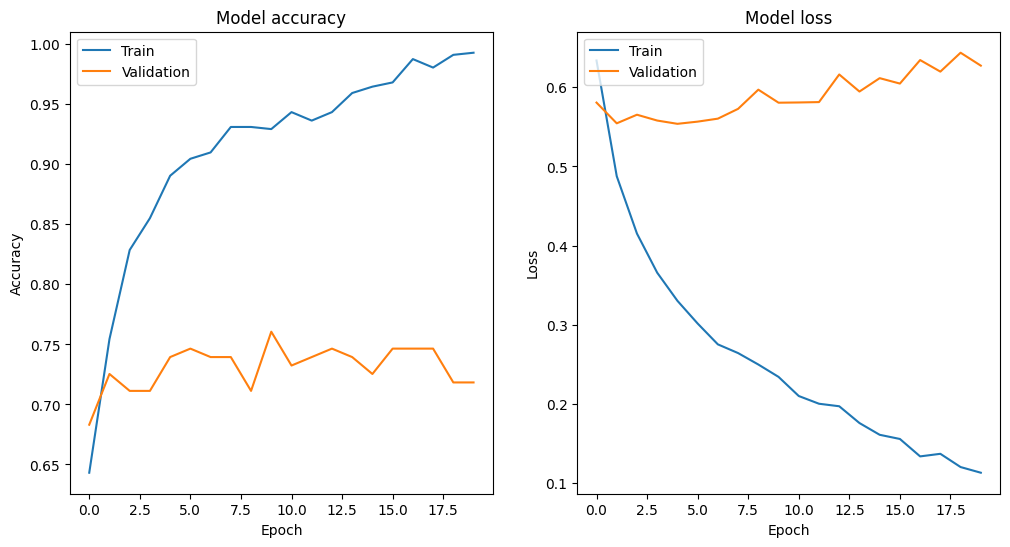

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Define model checkpoint callback
model_checkpoint = ModelCheckpoint(filepath='/mnt/data/inception_best_model.h5', 
                                   save_best_only=True, 
                                   monitor='val_loss', 
                                   mode='min')

# Load InceptionV3 model, pretrained on imagenet data
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3 base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # assuming binary classification

# The model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the checkpoint callback
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    epochs=20, batch_size=32, 
                    callbacks=[model_checkpoint])

# Save the final model
model.save('/mnt/data/my_inception_final_model.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save plots to a file
plt.savefig('/mnt/data/training_plots.png')

plt.show()


In [13]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Assuming X_train, y_train, X_val, y_val are predefined and loaded correctly

# Define the hyperparameter grid
batch_sizes = [16, 32, 64]
learning_rates = [1e-4, 1e-3, 1e-2]

# Save the best model's parameters and performance
best_accuracy = 0
best_parameters = {
    'batch_size': None,
    'learning_rate': None
}

# Perform grid search
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        print(f"Training with batch size {batch_size} and learning rate {learning_rate}")
        
        # Load the InceptionV3 base model
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
        # Freeze the layers
        for layer in base_model.layers:
            layer.trainable = False
        
        # Add custom layers on top
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(1, activation='sigmoid')(x)  # Binary classification
        
        # The model we will train
        model = Model(inputs=base_model.input, outputs=predictions)
        
        # Compile the model
        model.compile(optimizer=Adam(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
        
        # Train the model
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=batch_size)
        
        # Get the best validation accuracy from the current grid search
        val_accuracy = np.max(history.history['val_accuracy'])
        
        # Update best accuracy and parameters if current model is better
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_parameters['batch_size'] = batch_size
            best_parameters['learning_rate'] = learning_rate
            # Save the best model
            model.save('/mnt/data/best_inception_model.h5')

# Print the best parameters
print(f"Best validation accuracy: {best_accuracy}")
print(f"Best batch size: {best_parameters['batch_size']}")
print(f"Best learning rate: {best_parameters['learning_rate']}")


Training with batch size 16 and learning rate 0.0001
Epoch 1/20
36/36 [==============================] - 74s 2s/step - loss: 0.6484 - accuracy: 0.6643 - val_loss: 0.5549 - val_accuracy: 0.6901
Epoch 2/20
36/36 [==============================] - 49s 1s/step - loss: 0.4357 - accuracy: 0.7968 - val_loss: 0.5713 - val_accuracy: 0.7113
Epoch 3/20
36/36 [==============================] - 47s 1s/step - loss: 0.3890 - accuracy: 0.8145 - val_loss: 0.5734 - val_accuracy: 0.6901
Epoch 4/20
36/36 [==============================] - 52s 1s/step - loss: 0.3547 - accuracy: 0.8498 - val_loss: 0.5464 - val_accuracy: 0.7465
Epoch 5/20
36/36 [==============================] - 49s 1s/step - loss: 0.3372 - accuracy: 0.8392 - val_loss: 0.5961 - val_accuracy: 0.7394
Epoch 6/20
36/36 [==============================] - 47s 1s/step - loss: 0.2887 - accuracy: 0.8816 - val_loss: 0.5740 - val_accuracy: 0.7183
Epoch 7/20
36/36 [==============================] - 46s 1s/step - loss: 0.2529 - accuracy: 0.9117 - val_los

18/18 [==============================] - 50s 3s/step - loss: 0.2445 - accuracy: 0.9011 - val_loss: 0.8027 - val_accuracy: 0.7183
Epoch 16/20
18/18 [==============================] - 34s 2s/step - loss: 0.1422 - accuracy: 0.9523 - val_loss: 0.8941 - val_accuracy: 0.6901
Epoch 17/20
18/18 [==============================] - 38s 2s/step - loss: 0.1990 - accuracy: 0.9152 - val_loss: 0.9942 - val_accuracy: 0.6901
Epoch 18/20
18/18 [==============================] - 40s 2s/step - loss: 0.1063 - accuracy: 0.9647 - val_loss: 0.9125 - val_accuracy: 0.7042
Epoch 19/20
18/18 [==============================] - 30s 2s/step - loss: 0.1681 - accuracy: 0.9223 - val_loss: 1.2516 - val_accuracy: 0.7254
Epoch 20/20
18/18 [==============================] - 28s 2s/step - loss: 0.1358 - accuracy: 0.9488 - val_loss: 0.9749 - val_accuracy: 0.7183
Training with batch size 64 and learning rate 0.0001
Epoch 1/20
9/9 [==============================] - 36s 3s/step - loss: 0.7132 - accuracy: 0.5707 - val_loss: 0.601

9/9 [==============================] - 37s 4s/step - loss: 0.3057 - accuracy: 0.8852 - val_loss: 0.6497 - val_accuracy: 0.7394
Epoch 14/20
9/9 [==============================] - 50s 6s/step - loss: 0.2757 - accuracy: 0.8781 - val_loss: 0.7031 - val_accuracy: 0.7254
Epoch 15/20
9/9 [==============================] - 39s 4s/step - loss: 0.2558 - accuracy: 0.9011 - val_loss: 0.7259 - val_accuracy: 0.7465
Epoch 16/20
9/9 [==============================] - 35s 4s/step - loss: 0.2481 - accuracy: 0.9170 - val_loss: 0.7847 - val_accuracy: 0.7254
Epoch 17/20
9/9 [==============================] - 38s 4s/step - loss: 0.2518 - accuracy: 0.8922 - val_loss: 0.7523 - val_accuracy: 0.7535
Epoch 18/20
9/9 [==============================] - 36s 4s/step - loss: 0.2265 - accuracy: 0.9152 - val_loss: 0.7694 - val_accuracy: 0.7394
Epoch 19/20
9/9 [==============================] - 35s 4s/step - loss: 0.2112 - accuracy: 0.9170 - val_loss: 0.9061 - val_accuracy: 0.6831
Epoch 20/20
9/9 [======================

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(X_train.shape[1:])),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)


Epoch 1/20
18/18 [==============================] - 8s 392ms/step - loss: 0.7170 - accuracy: 0.5530 - val_loss: 0.6735 - val_accuracy: 0.5915
Epoch 2/20
18/18 [==============================] - 7s 391ms/step - loss: 0.6597 - accuracy: 0.6007 - val_loss: 0.6589 - val_accuracy: 0.6127
Epoch 3/20
18/18 [==============================] - 7s 386ms/step - loss: 0.6571 - accuracy: 0.6219 - val_loss: 0.6408 - val_accuracy: 0.6127
Epoch 4/20
18/18 [==============================] - 9s 491ms/step - loss: 0.6247 - accuracy: 0.6343 - val_loss: 0.6311 - val_accuracy: 0.6268
Epoch 5/20
18/18 [==============================] - 8s 454ms/step - loss: 0.6282 - accuracy: 0.6484 - val_loss: 0.6316 - val_accuracy: 0.6831
Epoch 6/20
18/18 [==============================] - 10s 565ms/step - loss: 0.5978 - accuracy: 0.6926 - val_loss: 0.6948 - val_accuracy: 0.5986
Epoch 7/20
18/18 [==============================] - 10s 540ms/step - loss: 0.6181 - accuracy: 0.6608 - val_loss: 0.6679 - val_accuracy: 0.5845
Epoc

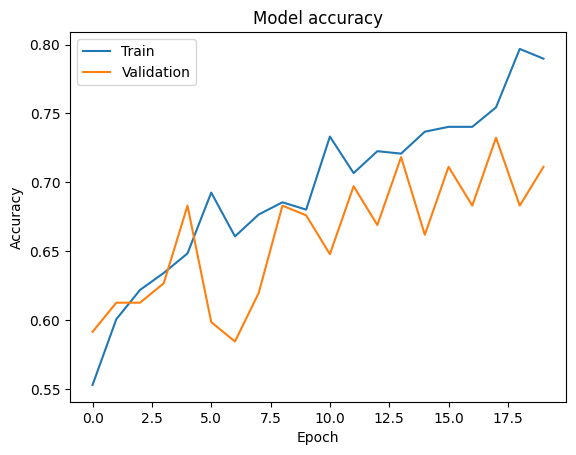

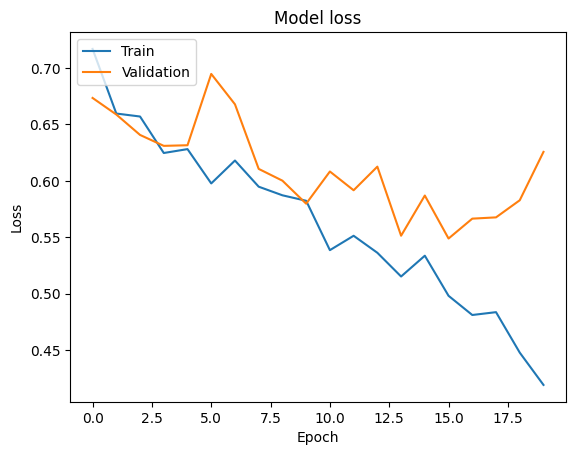

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

model_resnet = Sequential()
model_resnet.add(base_model_resnet)
model_resnet.add(GlobalAveragePooling2D())
model_resnet.add(Dense(1024, activation='relu'))
model_resnet.add(Dropout(0.5))
model_resnet.add(Dense(1, activation='sigmoid'))

# Compile the model
model_resnet.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(data_gen.flow(X_train, y_train, batch_size=32),
                                  validation_data=(X_val, y_val),
                                  epochs=20)


Epoch 1/20
18/18 [==============================] - 118s 6s/step - loss: 0.7612 - accuracy: 0.5777 - val_loss: 1.5871 - val_accuracy: 0.4859
Epoch 2/20
18/18 [==============================] - 98s 5s/step - loss: 0.6094 - accuracy: 0.7049 - val_loss: 1.0730 - val_accuracy: 0.4859
Epoch 3/20
18/18 [==============================] - 98s 5s/step - loss: 0.5399 - accuracy: 0.7367 - val_loss: 0.9760 - val_accuracy: 0.4859
Epoch 4/20
18/18 [==============================] - 100s 6s/step - loss: 0.5037 - accuracy: 0.7721 - val_loss: 0.6917 - val_accuracy: 0.4930
Epoch 5/20
18/18 [==============================] - 99s 5s/step - loss: 0.4371 - accuracy: 0.8039 - val_loss: 0.7069 - val_accuracy: 0.4859
Epoch 6/20
18/18 [==============================] - 104s 6s/step - loss: 0.3651 - accuracy: 0.8445 - val_loss: 0.6992 - val_accuracy: 0.4859
Epoch 7/20
18/18 [==============================] - 105s 6s/step - loss: 0.3669 - accuracy: 0.8463 - val_loss: 0.7629 - val_accuracy: 0.4859
Epoch 8/20
18/18

In [ ]:
# Save the model
model_resnet.save('res_net_2.h5')

# Get predictions for a couple of sample images
sample_indices = [0, 1]  # Replace with the indices of the samples you want to visualize
sample_images = X_val[sample_indices]
sample_labels_actual = y_val[sample_indices]
sample_labels_predicted = model_resnet.predict(sample_images)

class_names = ['No disease', 'Parkinson\'s Disease']  # Updated class names

# Display the sample images along with whether the prediction was correct or not
for i in range(len(sample_indices)):
    plt.figure(figsize=(8, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(sample_images[i])
    plt.title('Sample Image')
    
    plt.subplot(1, 2, 2)
    pred_prob_parkinson = float(sample_labels_predicted[i])
    
    predicted_class = 1 if pred_prob_parkinson > 0.5 else 0
    actual_class = int(sample_labels_actual[i])
    
    prediction_correct = "Correct" if predicted_class == actual_class else "Incorrect"
    
    plt.bar(class_names, [1 - pred_prob_parkinson, pred_prob_parkinson], color=['blue', 'orange'])
    plt.xlabel('Classes')
    plt.ylabel('Probability')
    plt.title('Prediction: {}'.format(prediction_correct))
    
    plt.tight_layout()
    plt.show()
#This code first builds and trains the model, then saves it as "res_net_2.h5", and finally displays the visualization of prediction

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the ResNet50 base model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Build the model
model_resnet = Sequential()
model_resnet.add(base_model_resnet)
model_resnet.add(GlobalAveragePooling2D())
model_resnet.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
model_resnet.add(Dropout(0.5))
model_resnet.add(Dense(1, activation='sigmoid'))

# Compile the model
model_resnet.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Implement Early Stopping and Learning Rate Reduction
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
callbacks = [early_stop, reduce_lr]

# Train the model
history_resnet = model_resnet.fit(data_gen.flow(X_train, y_train, batch_size=32),
                                  validation_data=(X_val, y_val),
                                  epochs=20, 
                                  callbacks=callbacks)


Epoch 1/20
18/18 [==============================] - 79s 4s/step - loss: 2.1600 - accuracy: 0.5830 - val_loss: 2.0537 - val_accuracy: 0.5141 - lr: 1.0000e-04
Epoch 2/20
18/18 [==============================] - 74s 4s/step - loss: 1.9915 - accuracy: 0.7032 - val_loss: 2.0738 - val_accuracy: 0.5141 - lr: 1.0000e-04
Epoch 3/20
18/18 [==============================] - 74s 4s/step - loss: 1.8847 - accuracy: 0.7314 - val_loss: 2.1158 - val_accuracy: 0.5141 - lr: 1.0000e-04
Epoch 4/20
18/18 [==============================] - 74s 4s/step - loss: 1.7767 - accuracy: 0.7739 - val_loss: 2.0419 - val_accuracy: 0.4859 - lr: 1.0000e-04
Epoch 5/20
18/18 [==============================] - 81s 5s/step - loss: 1.7904 - accuracy: 0.8057 - val_loss: 2.0109 - val_accuracy: 0.4859 - lr: 1.0000e-04
Epoch 6/20
18/18 [==============================] - 82s 5s/step - loss: 1.7815 - accuracy: 0.7774 - val_loss: 2.0550 - val_accuracy: 0.5141 - lr: 1.0000e-04
Epoch 7/20
18/18 [==============================] - 74s 4s

In [14]:
model_resnet.save('resnet_model_1.h5')

4/4 [==============================] - 4s 798ms/step


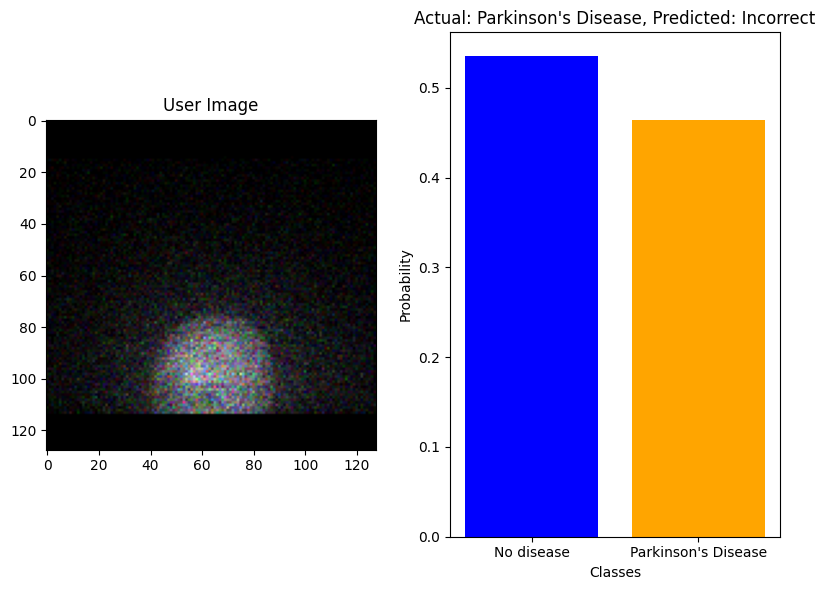

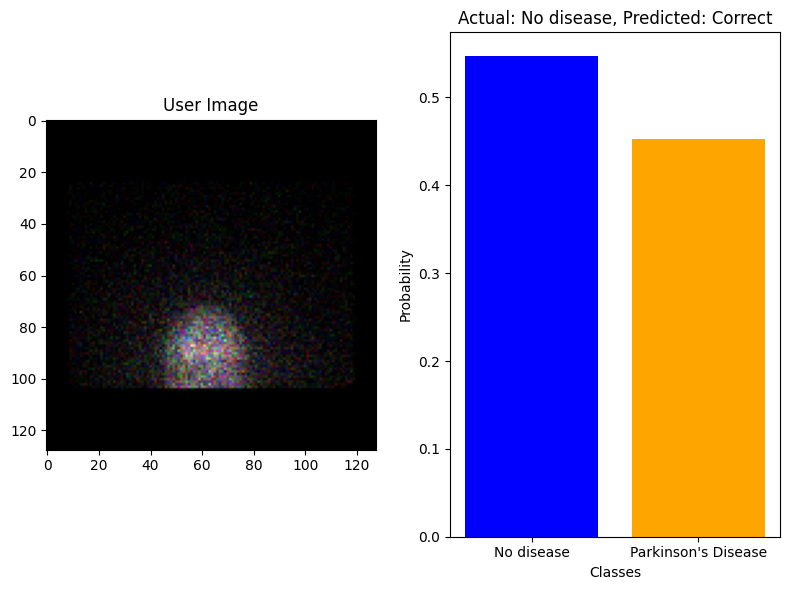

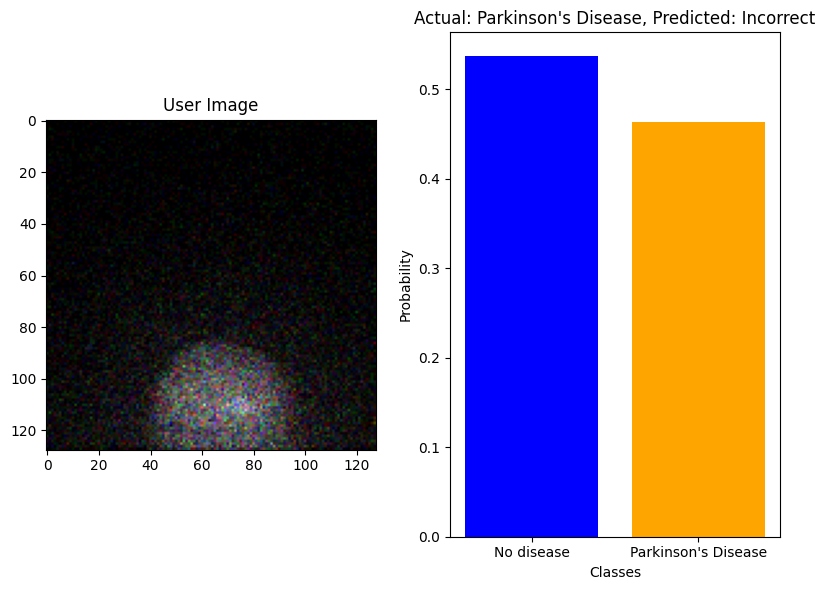

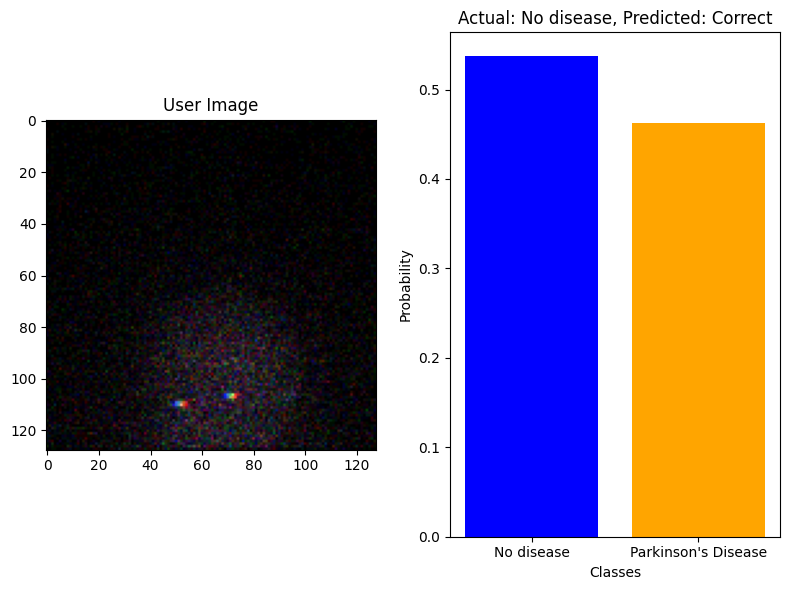

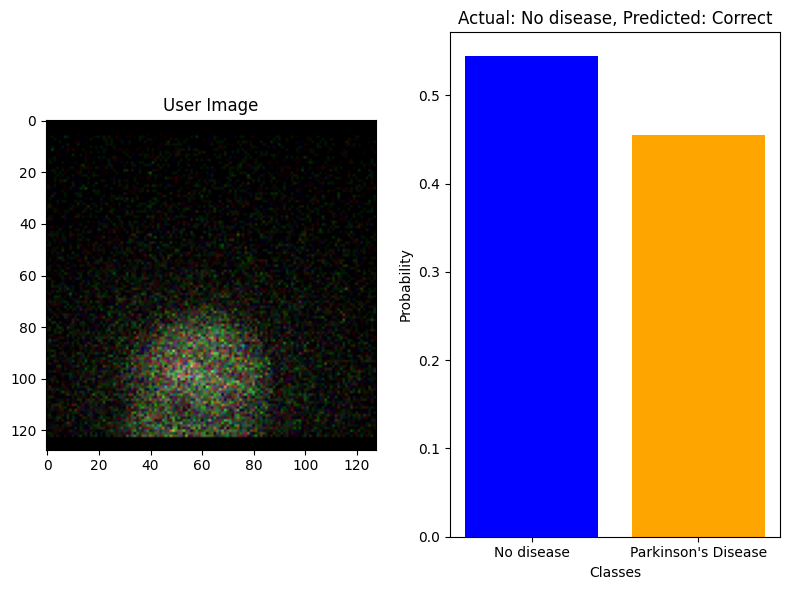

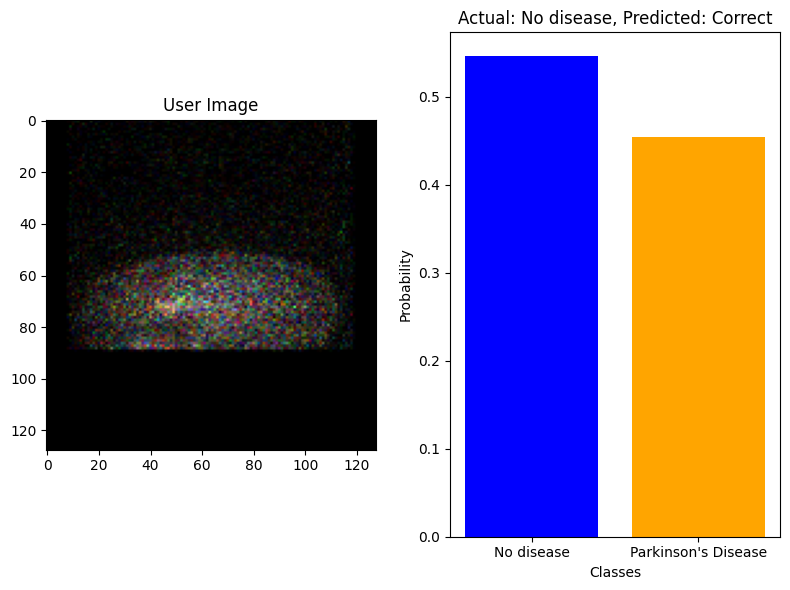

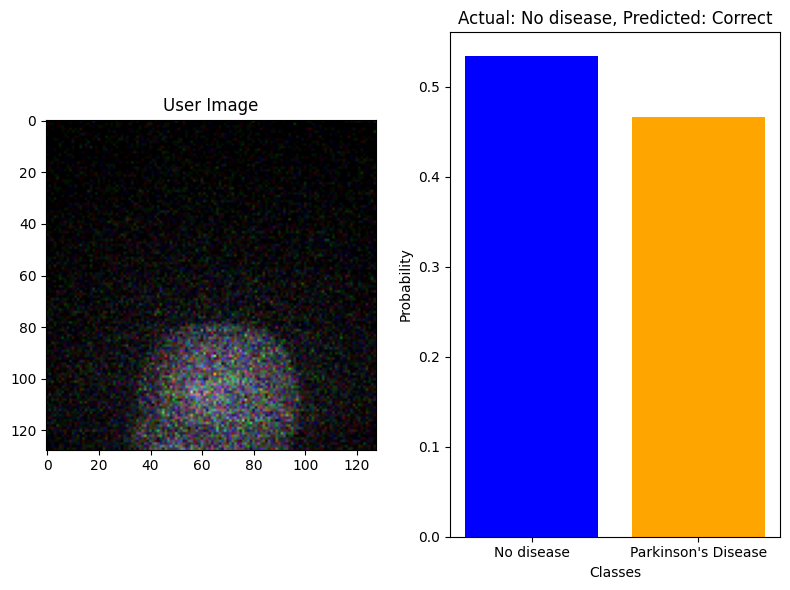

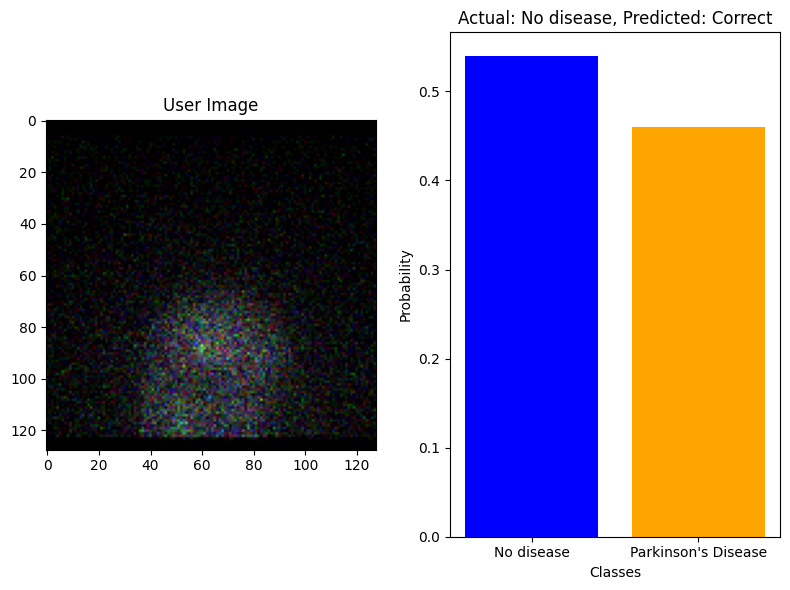

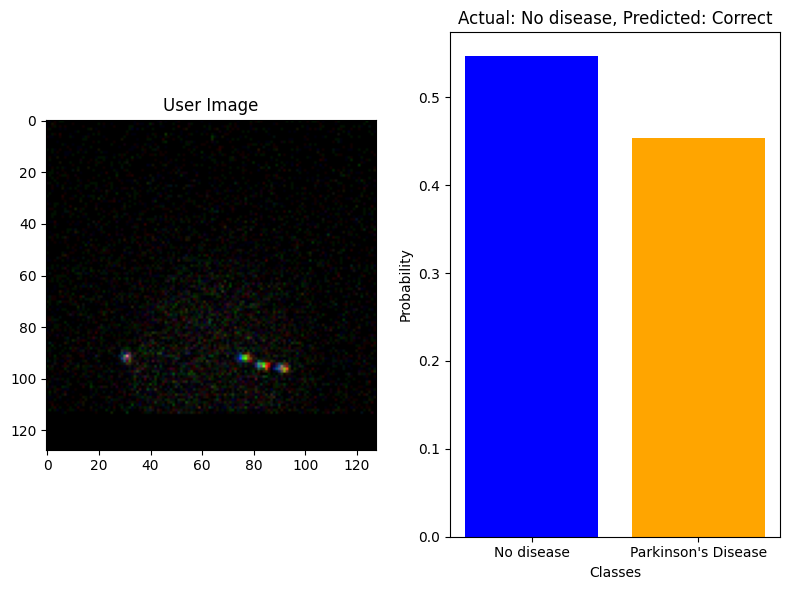

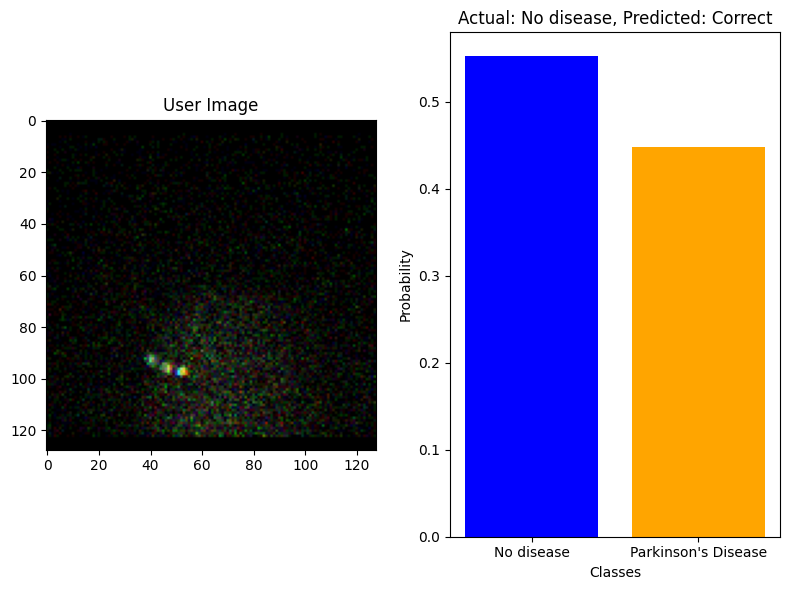

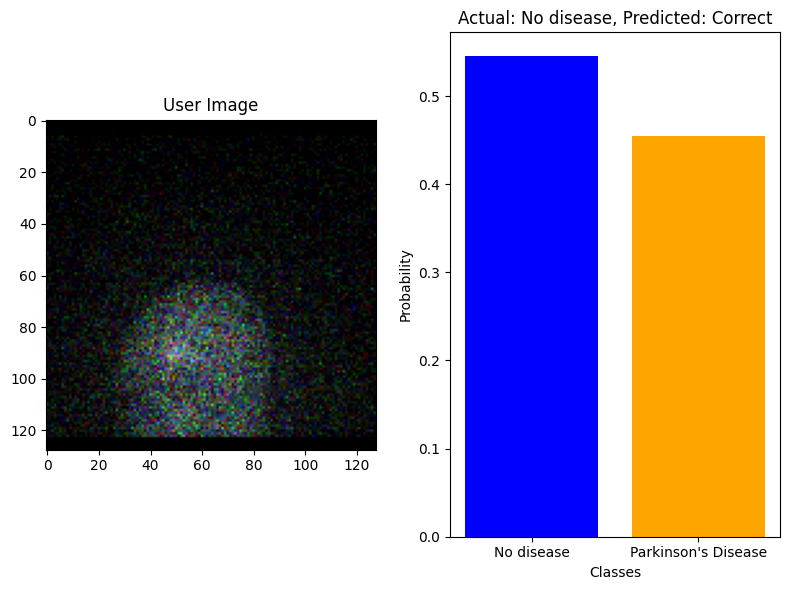

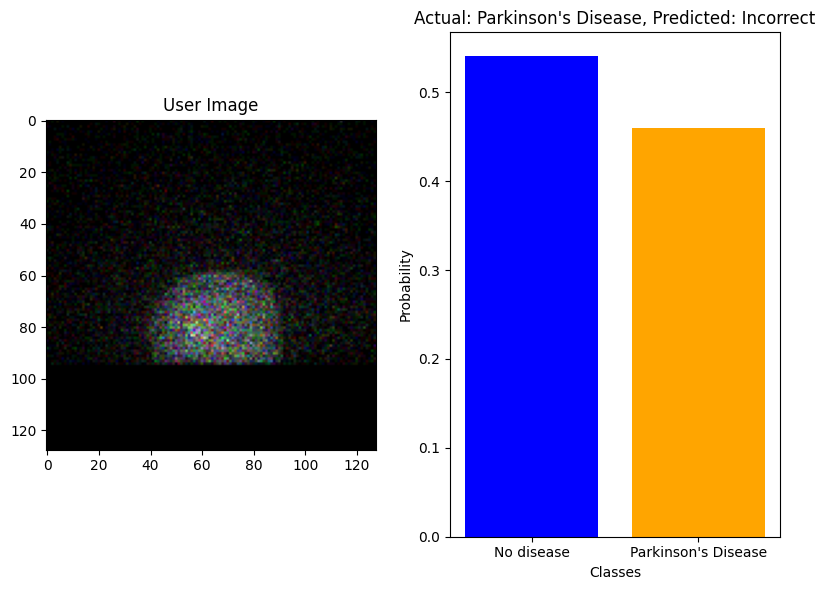

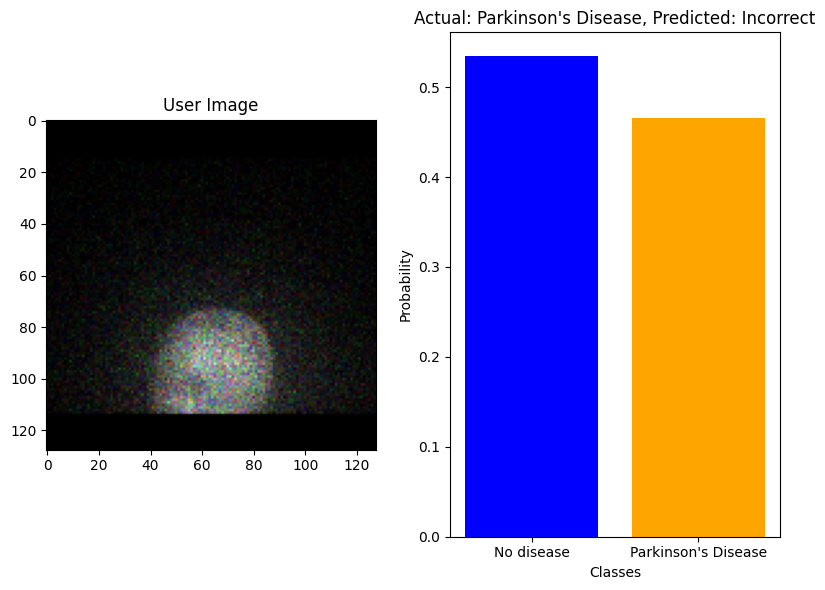

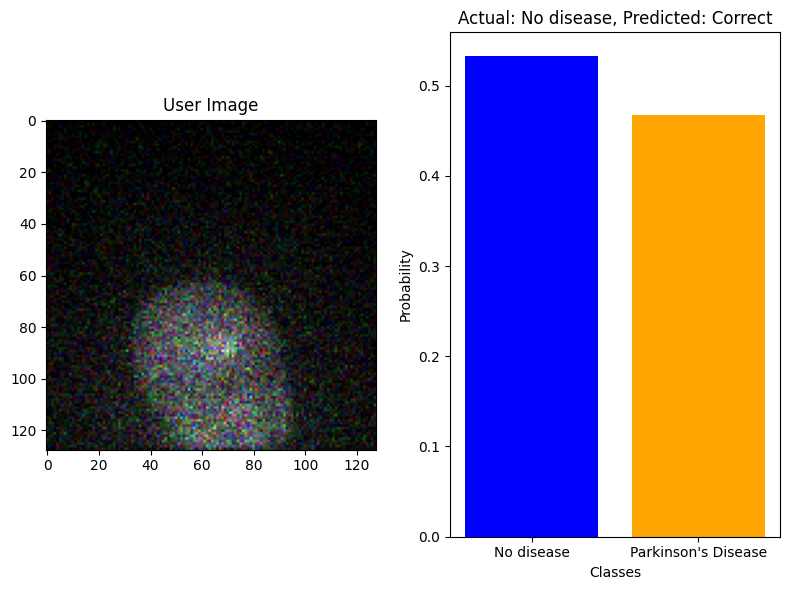

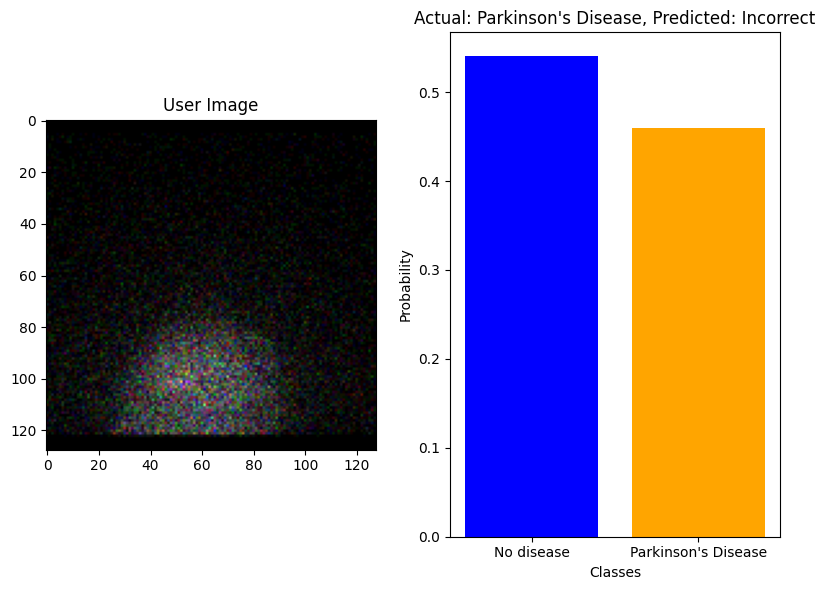

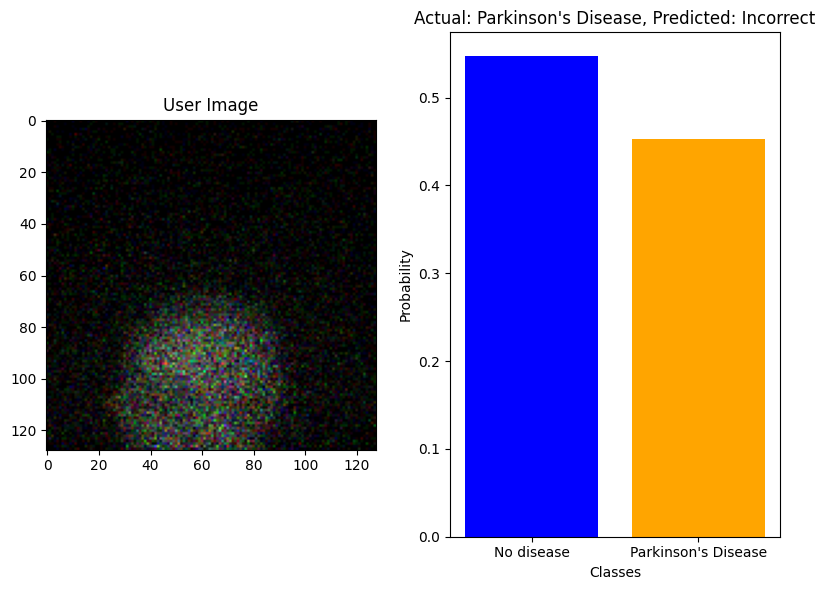

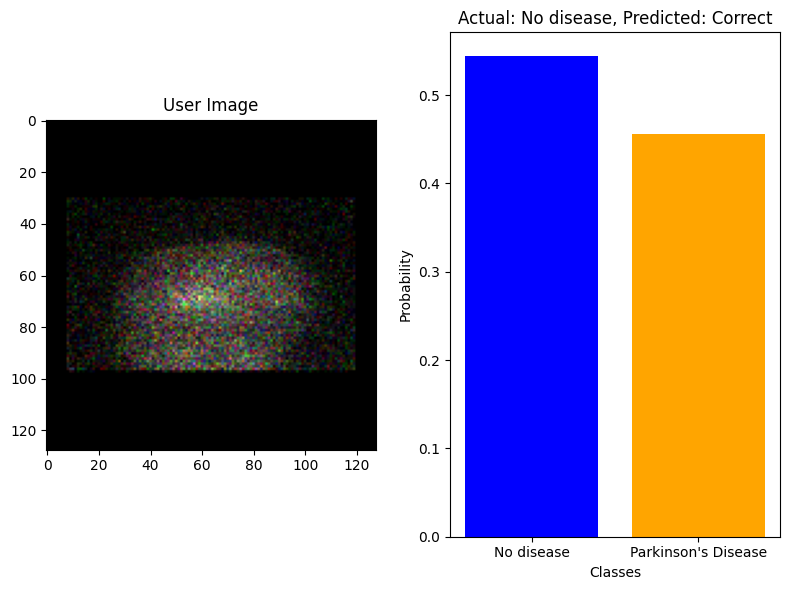

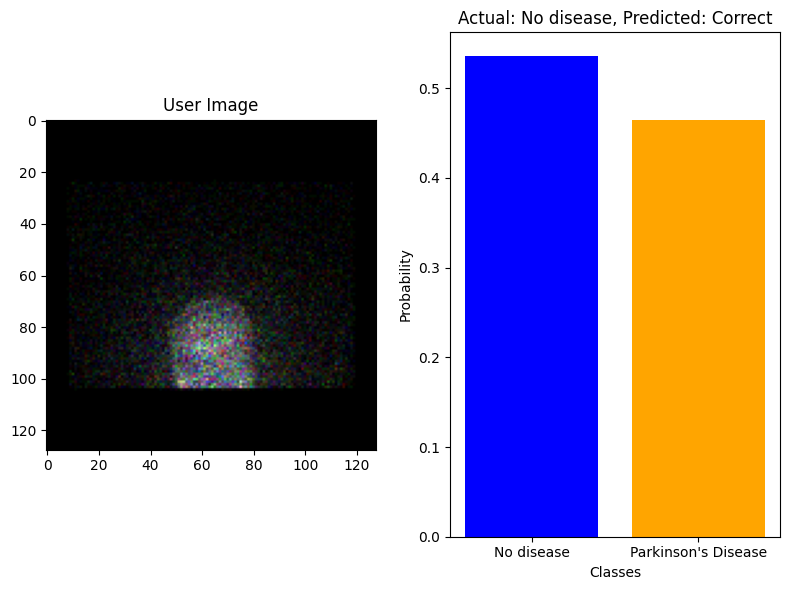

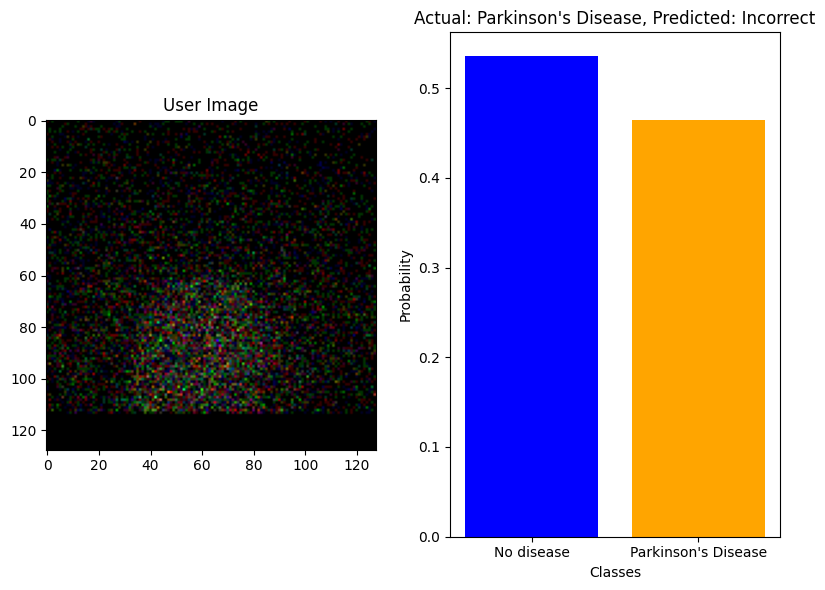

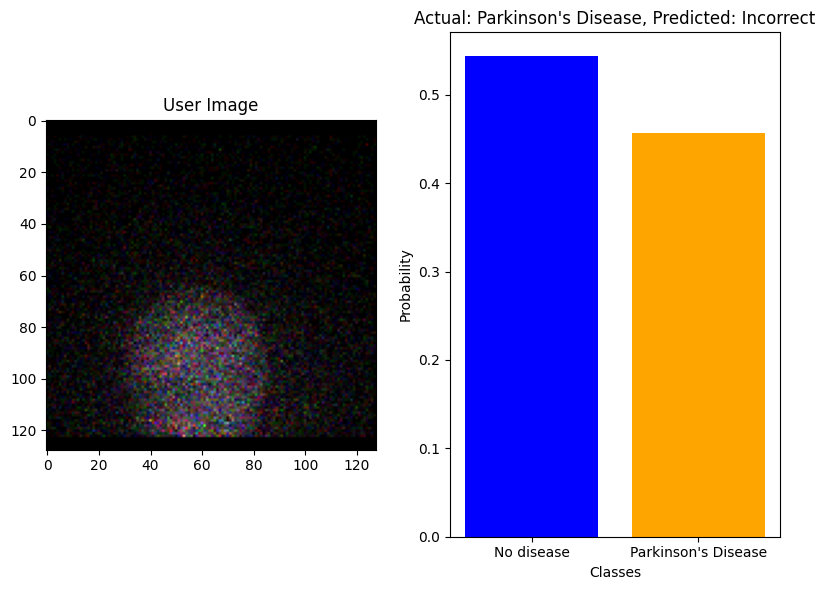

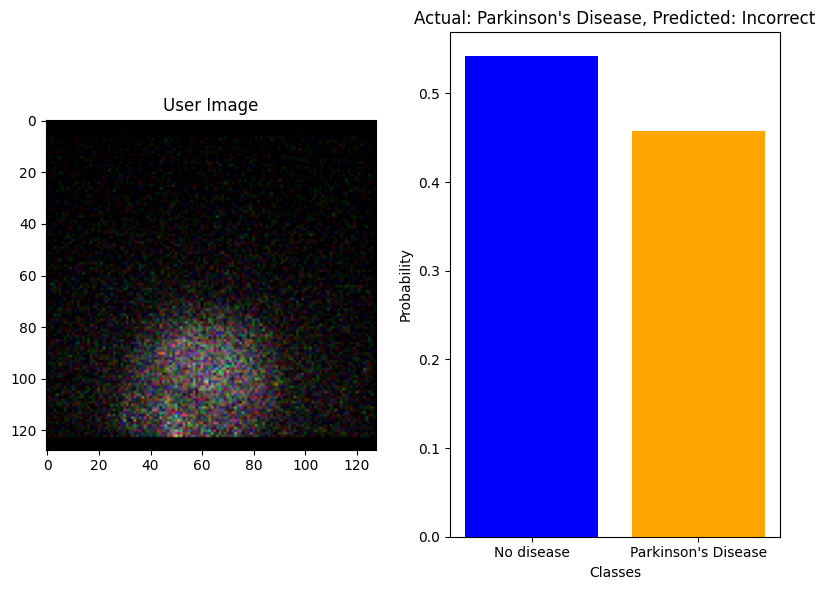

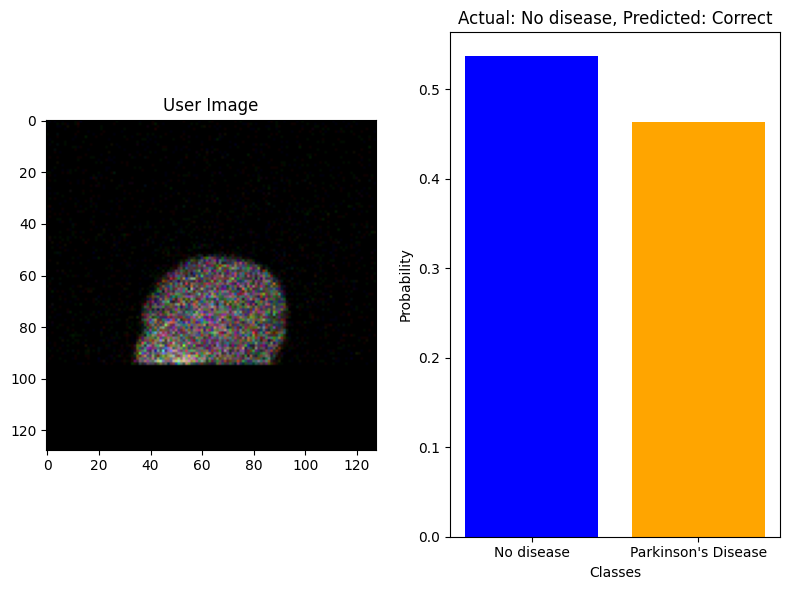

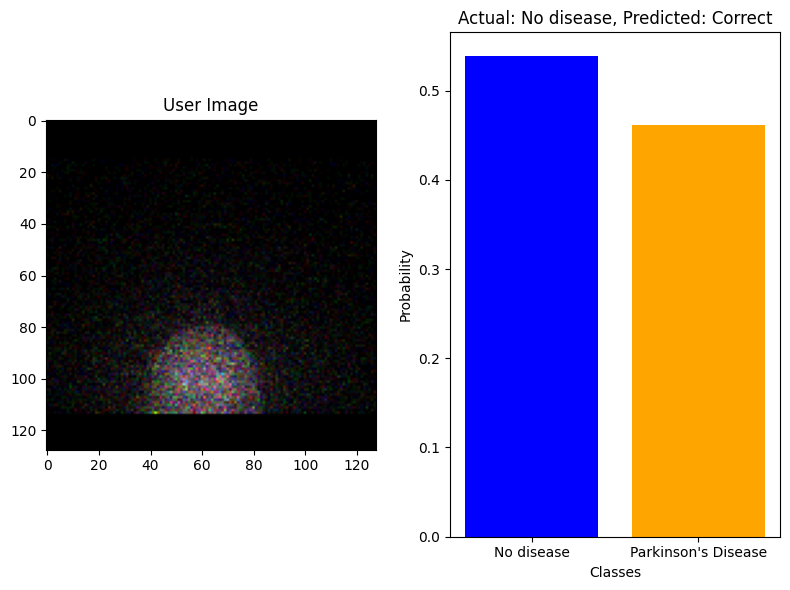

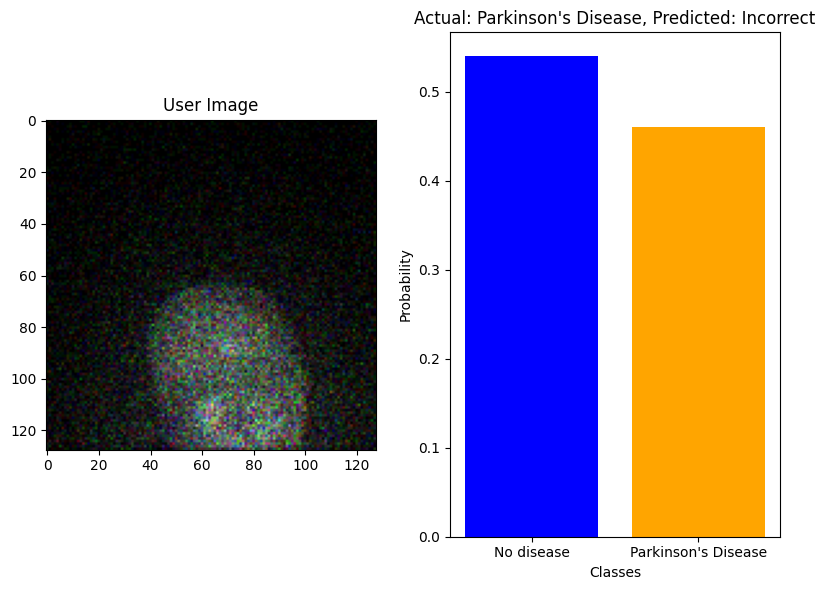

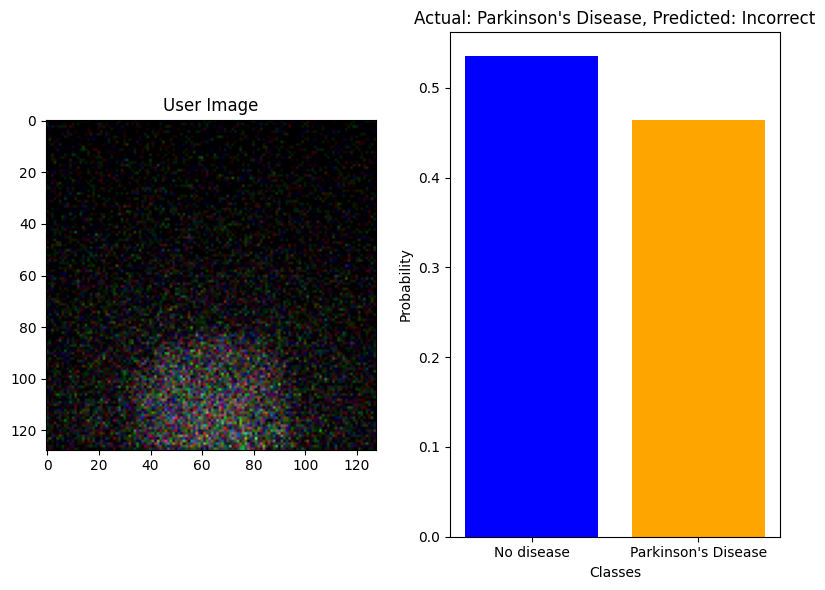

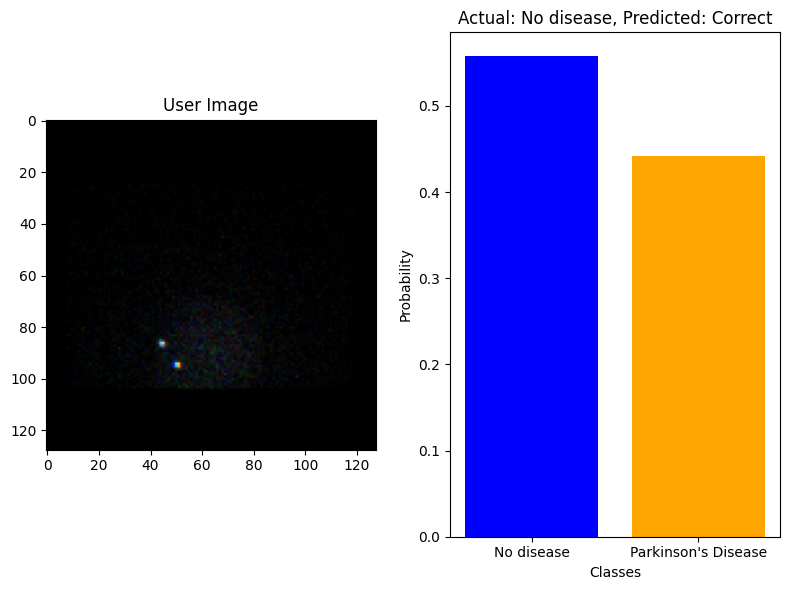

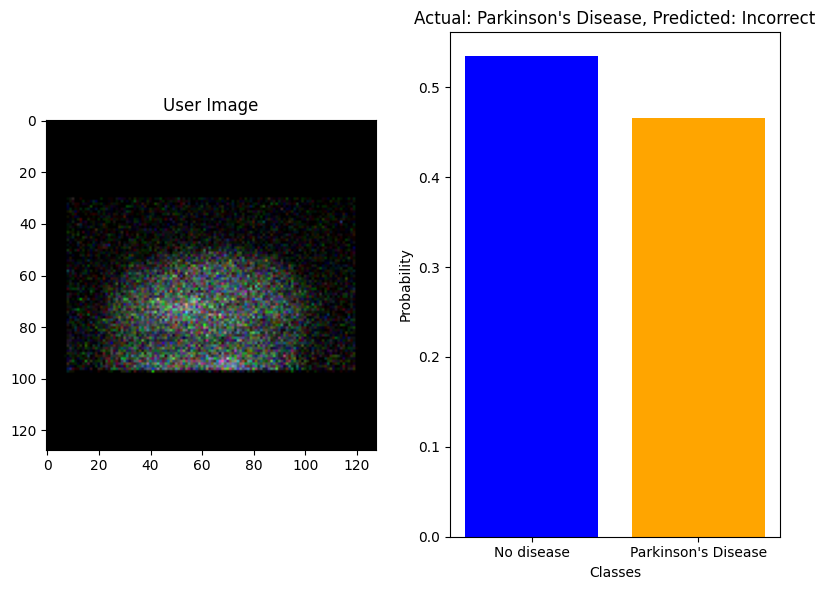

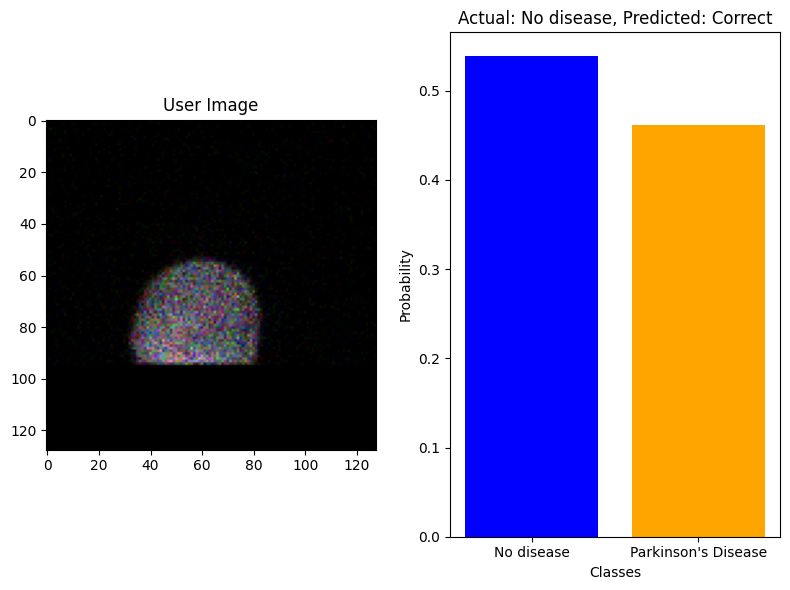

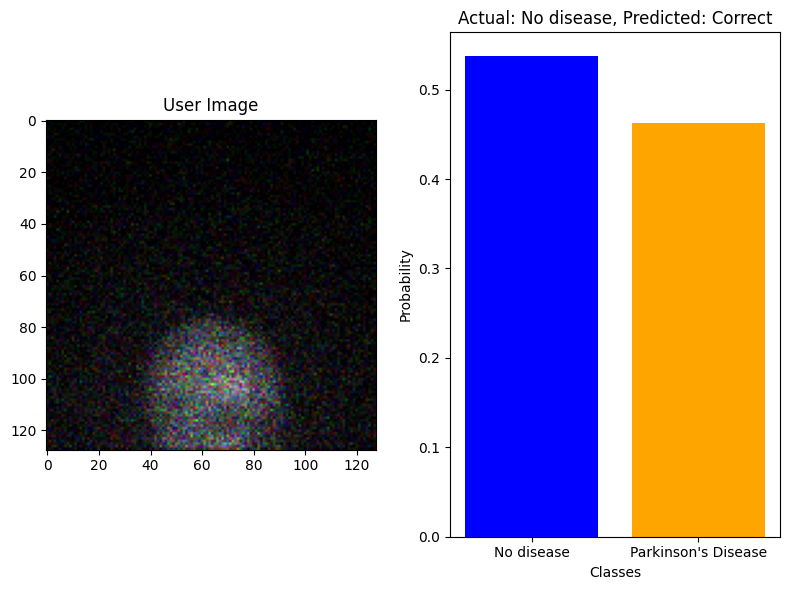

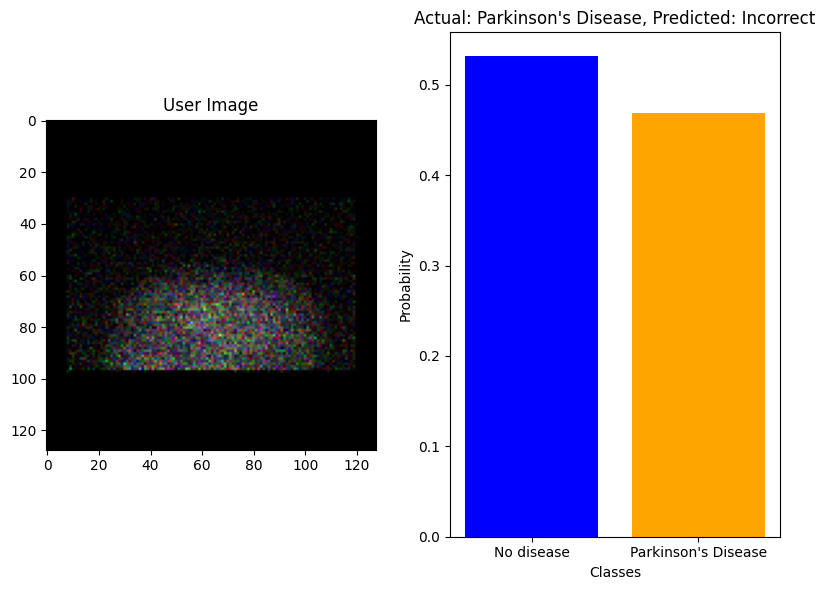

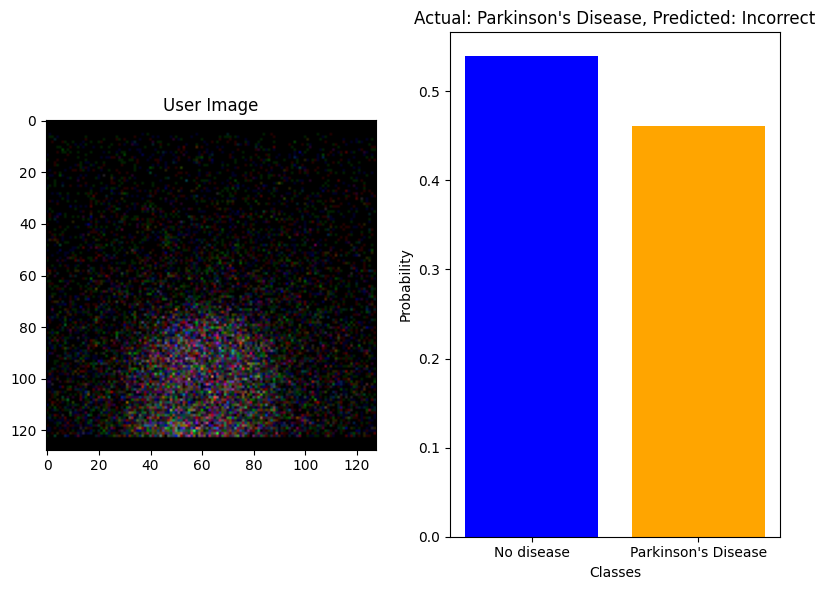

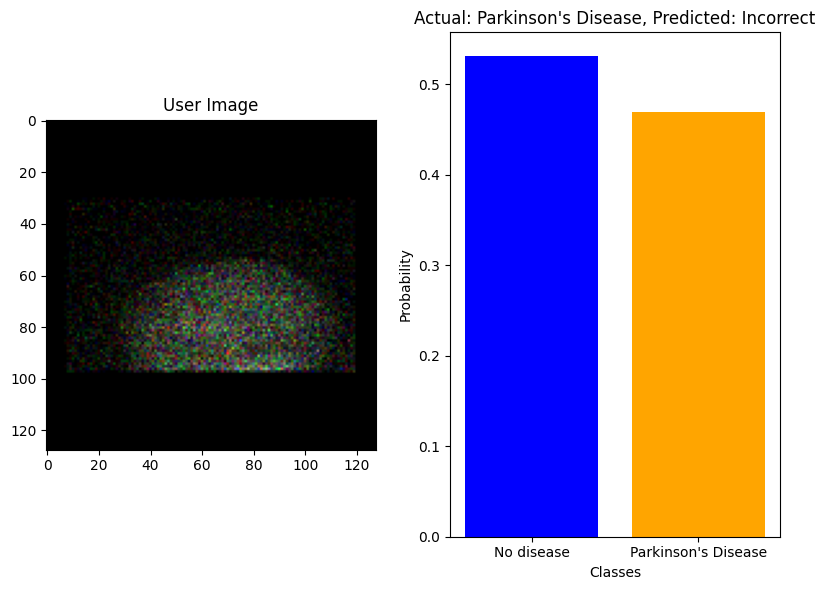

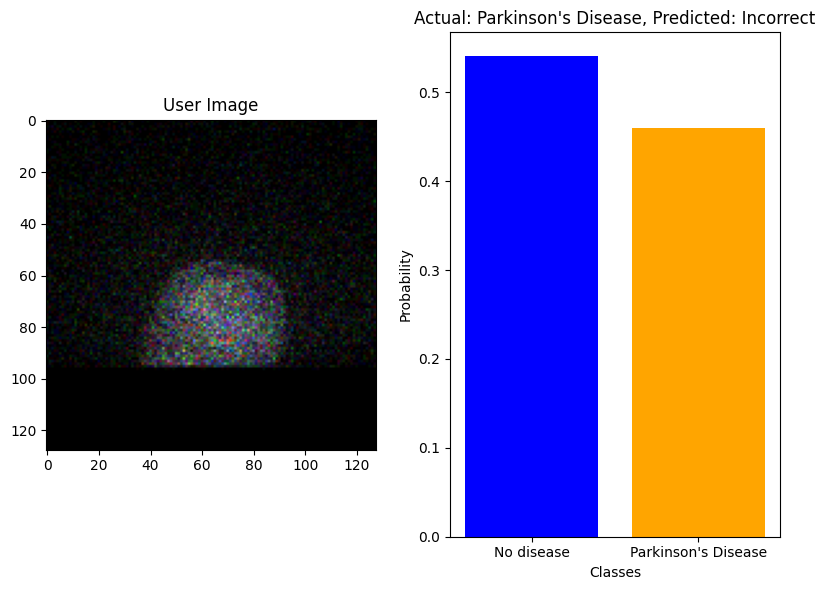

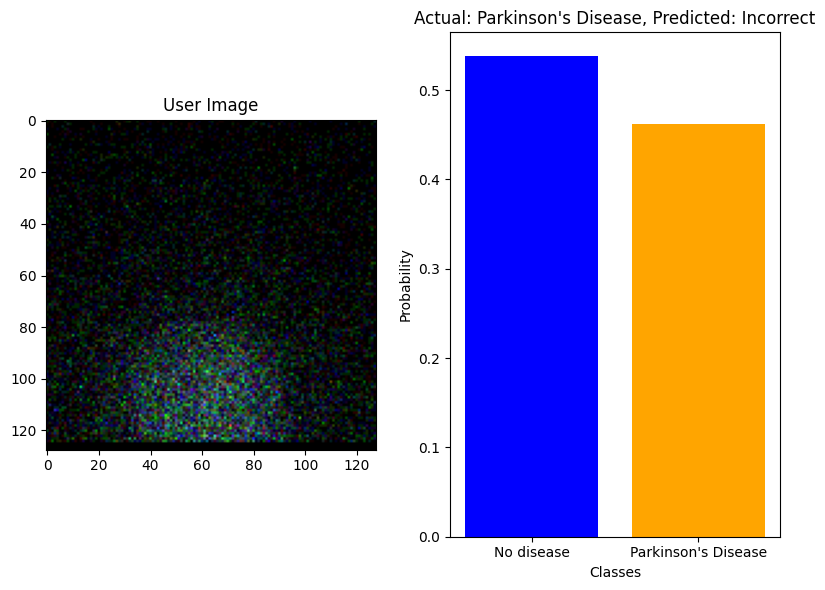

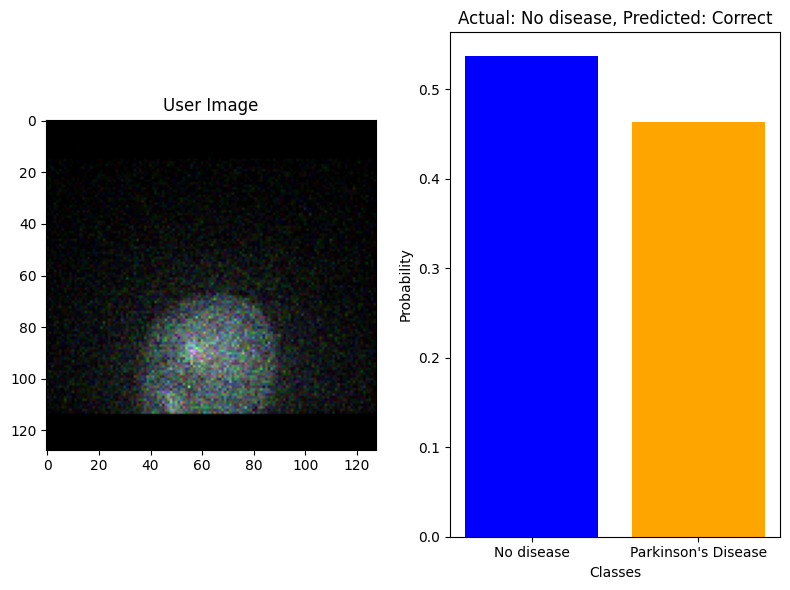

KeyboardInterrupt: 

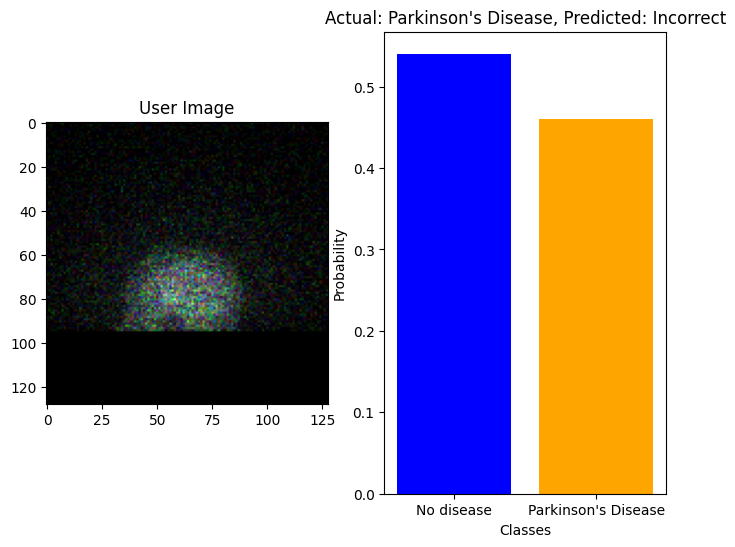

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train, and model_resnet defined

# Get predictions for a couple of sample images
sample_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]  # Replace with the indices of the samples you want to visualize
sample_images = X_train[sample_indices]
sample_labels_actual = y_train[sample_indices]
sample_labels_predicted = model_resnet.predict(sample_images)

class_names = ['No disease', 'Parkinson\'s Disease']  # Updated class names

# Display the sample images along with their actual and predicted labels
for i in range(len(sample_indices)):
    plt.figure(figsize=(8, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(sample_images[i])
    plt.title('User Image')
    
    plt.subplot(1, 2, 2)
    # Convert predicted probabilities to scalars
    pred_prob_no_disease = float(1 - sample_labels_predicted[i])
    pred_prob_parkinson = float(sample_labels_predicted[i])
    predicted_class = 1 if pred_prob_parkinson > 0.5 else 0
    actual_class = int(sample_labels_actual[i])
    prediction_correct = "Correct" if predicted_class == actual_class else "Incorrect"
    if (predicted_class == 1):
        print(i)
        continue
    
    plt.bar(class_names, [pred_prob_no_disease, pred_prob_parkinson], color=['blue', 'orange'])
    plt.xlabel('Classes')
    plt.ylabel('Probability')
    plt.title('Actual: {}, Predicted: {}'.format(class_names[int(sample_labels_actual[i])], prediction_correct))
    
    plt.tight_layout()
    plt.show()


In [16]:
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

model_inception = Sequential()
model_inception.add(base_model_inception)
model_inception.add(GlobalAveragePooling2D())
model_inception.add(Dense(1024, activation='relu'))
model_inception.add(Dropout(0.5))
model_inception.add(Dense(1, activation='sigmoid'))

# Compile the model
model_inception.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Train the model
history_inception = model_inception.fit(data_gen.flow(X_train, y_train, batch_size=32),
                                        validation_data=(X_val, y_val),
                                        epochs=20)


87910968/87910968 [==============================] - 77s 1us/step
Epoch 1/20
18/18 [==============================] - 70s 3s/step - loss: 0.7299 - accuracy: 0.5459 - val_loss: 0.7840 - val_accuracy: 0.5352
Epoch 2/20
18/18 [==============================] - 50s 3s/step - loss: 0.6818 - accuracy: 0.5883 - val_loss: 0.7846 - val_accuracy: 0.5141
Epoch 3/20
18/18 [==============================] - 50s 3s/step - loss: 0.6891 - accuracy: 0.6148 - val_loss: 0.7233 - val_accuracy: 0.5282
Epoch 4/20
18/18 [==============================] - 50s 3s/step - loss: 0.6223 - accuracy: 0.6431 - val_loss: 0.6878 - val_accuracy: 0.5775
Epoch 5/20
18/18 [==============================] - 51s 3s/step - loss: 0.6659 - accuracy: 0.6608 - val_loss: 0.7421 - val_accuracy: 0.5563
Epoch 6/20
18/18 [==============================] - 52s 3s/step - loss: 0.5885 - accuracy: 0.7014 - val_loss: 0.8656 - val_accuracy: 0.5634
Epoch 7/20
18/18 [==============================] - 50s 3s/step - loss: 0.5565 - accuracy: 0.7

In [ ]:
model_inception.save('inception_model_1.h5')

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Use the function for both models
plot_history(history_resnet, "ResNet")
plot_history(history_inception, "InceptionV3")

In [1]:
loss_resnet, acc_resnet = model_resnet.evaluate(X_val, y_val)
print(f"ResNet Validation Accuracy: {acc_resnet*100:.2f}%")

loss_inception, acc_inception = model_inception.evaluate(X_val, y_val)
print(f"InceptionV3 Validation Accuracy: {acc_inception*100:.2f}%")


NameError: name 'model_resnet' is not defined

In [ ]:
model_resnet.save("resnet_model.h5")
model_inception.save("inception_model.h5")


TypeError: Invalid shape (90, 128, 128) for image data

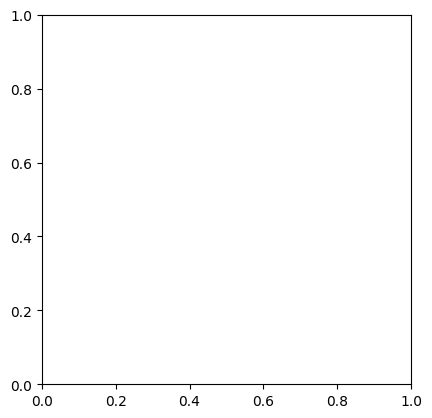

In [8]:
import pydicom
import matplotlib.pyplot as plt

# specify your image path
image_path = 'control\\3000\\Raw_Data\\2011-01-20_16_28_47.0\\I248908\\PPMI_3000_NM_Raw_Data_br_raw_20110805101009028_1_S117534_I248908.dcm'

# Read the DICOM file
ds = pydicom.dcmread(image_path)

# Extract the pixel array from the DICOM dataset
pixel_array = ds.pixel_array

# Display the image using matplotlib
plt.imshow(pixel_array, cmap='gray')  # Use the gray colormap for a grayscale image
plt.axis('off')  # Hide the axis values
plt.show()


In [10]:
import pydicom
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Read the DICOM file
ds = pydicom.dcmread(image_path)

# Extract the pixel array from the DICOM dataset
pixel_array = ds.pixel_array

# Define a function to display a slice
def display_slice(slice_index):
    plt.imshow(pixel_array[slice_index], cmap='gray')
    plt.axis('off')
    plt.title(f"Slice {slice_index}")
    plt.show()

# Create an interactive widget
slice_slider = widgets.interactive(display_slice, 
                                   slice_index=widgets.IntSlider(min=0, max=pixel_array.shape[0]-1, step=1, value=pixel_array.shape[0]//2))

display(slice_slider)


interactive(children=(IntSlider(value=45, description='slice_index', max=89), Output()), _dom_classes=('widget…